In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../dataset/dataset_1.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_LINGUA,Pessoas_Residencia
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,2.197094e+01,1.068572e+00,2.139669e+00,1.389569e+00,2.869310e+00,1.449150e+00,5.271628e-01,3.894223e+00
std,7.183446e+00,4.164400e-01,1.012008e+00,4.992919e-01,3.971679e+00,6.148688e-01,4.992617e-01,1.474267e+00
min,1.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00
50%,1.900000e+01,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
75%,2.300000e+01,1.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00
max,9.200000e+01,4.000000e+00,5.000000e+00,4.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,2.000000e+01


### Creating variables

#### House Income per capita

In [3]:
def mapea_per_capta(data):
    renda = data["Renda_Mensal"]
    capta = data["Pessoas_Residencia"]
    if renda == "A":
        return 0
    if renda == "B":
        return 998/capta    
    if renda == "C":
        return 1497/capta
    if renda == "D":
        return 1996/capta  
    if renda == "E":
        return 2495/capta  
    if renda == "F":
        return 2994/capta   
    if renda == "G":
        return 3992/capta
    if renda == "H":
        return 4990/capta 
    if renda == "I":
        return 5988/capta
    if renda == "J":
        return 6986/capta  
    if renda == "K":
        return 7984/capta  
    if renda == "L":
        return 8982/capta  
    if renda == "M":
        return 9980/capta
    if renda == "N":
        return 11976/capta 
    if renda == "O":
        return 14970/capta
    if renda == "P":
        return 19960/capta
    if renda == "Q":
        return 30000/capta 
    
data["Renda_per_capta"] = data.apply(mapea_per_capta, 1)

Text(0, 0.5, '')

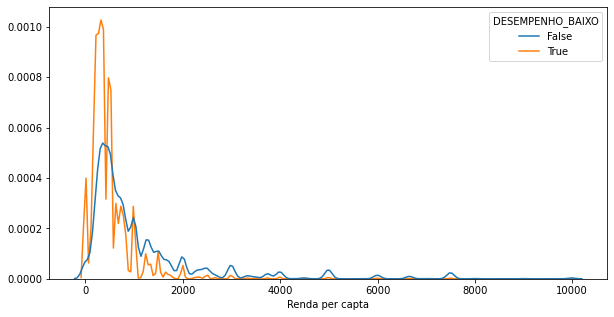

In [28]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data = data[data["Renda_per_capta"]<10000], x = "Renda_per_capta", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Renda per capta")
plt.ylabel("")

#### People per room

In [29]:
def mapea_pessoas_por_quarto(data):
    if data["Quartos"] == "A":
        return 0
    if data["Quartos"] == "B":
        return data["Pessoas_Residencia"]
    if data["Quartos"] == "C":
        return data["Pessoas_Residencia"]/2
    if data["Quartos"] == "D":
        return data["Pessoas_Residencia"]/3
    if data["Quartos"] == "E":
        return data["Pessoas_Residencia"]/4
    
data["Pessoas_por_quarto"] = data.apply(mapea_pessoas_por_quarto, 1)

Text(0, 0.5, '')

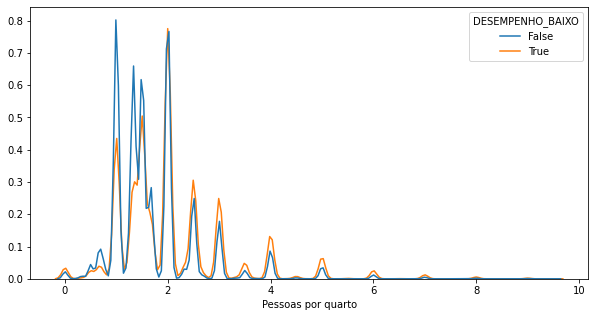

In [31]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data = data[data["Pessoas_por_quarto"]<10], x = "Pessoas_por_quarto", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Pessoas por quarto")
plt.ylabel("")

#### Persons per computer

In [32]:
def mapea_pessoas_por_computador(data):
    if data["Computador"] == "A":
        return 0
    if data["Computador"] == "B":
        return data["Pessoas_Residencia"]
    if data["Computador"] == "C":
        return data["Pessoas_Residencia"]/2
    if data["Computador"] == "D":
        return data["Pessoas_Residencia"]/3
    if data["Computador"] == "E":
        return data["Pessoas_Residencia"]/4
    
data["Pessoas_por_computador"] = data.apply(mapea_pessoas_por_computador, 1)

Text(0, 0.5, '')

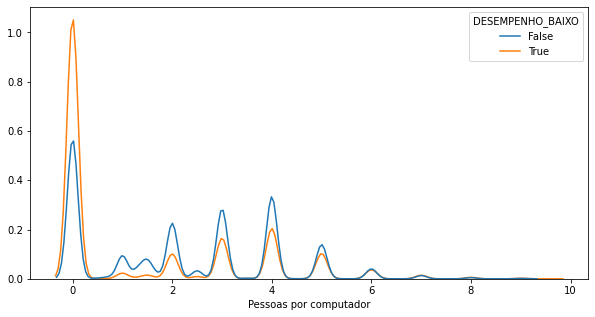

In [34]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data = data[data["Pessoas_por_computador"]<10], x = "Pessoas_por_computador", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Pessoas por computador")
plt.ylabel("")

#### Persons per cellphones

In [35]:
def mapea_celulares_por_pessoa(data):
    if data["Celular"] == "A":
        return 0
    if data["Celular"] == "B":
        return 1/data["Pessoas_Residencia"]
    if data["Celular"] == "C":
        return 2/data["Pessoas_Residencia"]
    if data["Celular"] == "D":
        return 3/data["Pessoas_Residencia"]
    if data["Celular"] == "E":
        return 4/data["Pessoas_Residencia"]
    
data["Celulares_por_pessoa"] = data.apply(mapea_celulares_por_pessoa, 1)

Text(0, 0.5, '')

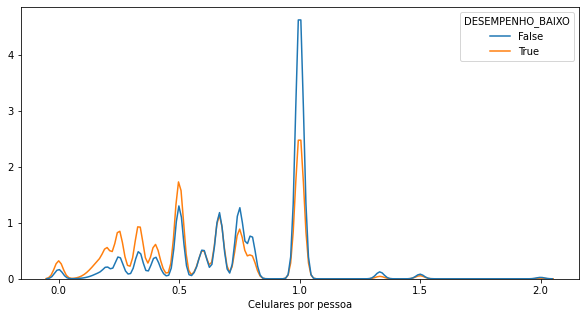

In [37]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data = data[data["Celulares_por_pessoa"]<2.5], x = "Celulares_por_pessoa", hue = "DESEMPENHO_BAIXO")
plt.xlabel("Celulares por pessoa")
plt.ylabel("")

### Treating variables

In [38]:
data.dtypes

NU_IDADE                    int64
SG_UF_RESIDENCIA           object
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_LINGUA                   int64
Escolaridade_Pai           object
Escolaridade_Mae           object
Ocupacao_Pai               object
Ocupacao_Mae               object
Pessoas_Residencia          int64
Renda_Mensal               object
Empregada_Domestica        object
Banheiros                  object
Quartos                    object
Carro                      object
Motocicleta                object
Geladeira                  object
Freezer                    object
Lava_Roupa                 object
Seca_Roupa                 object
Microondas                 object
Lava_Louca                 object
Aspirador                  object
Televisao                  object
DVD                        object
TV_Assinatura 

In [39]:
# Converting category columns to integers
for col in data.columns:
    if col != "Renda_per_capta" and col != "Pessoas_por_quarto" and col != "Pessoas_por_computador" and col != "Pessoas_por_celular":
        data[col] = pd.factorize(data[col], sort = True)[0]
data.dtypes

NU_IDADE                    int64
SG_UF_RESIDENCIA            int64
TP_SEXO                     int64
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_LINGUA                   int64
Escolaridade_Pai            int64
Escolaridade_Mae            int64
Ocupacao_Pai                int64
Ocupacao_Mae                int64
Pessoas_Residencia          int64
Renda_Mensal                int64
Empregada_Domestica         int64
Banheiros                   int64
Quartos                     int64
Carro                       int64
Motocicleta                 int64
Geladeira                   int64
Freezer                     int64
Lava_Roupa                  int64
Seca_Roupa                  int64
Microondas                  int64
Lava_Louca                  int64
Aspirador                   int64
Televisao                   int64
DVD                         int64
TV_Assinatura 

In [40]:
def convert(x):
    if x == 7: return -1
    else: return x

for col in ["Escolaridade_Pai", "Escolaridade_Mae"]:
    data[col] = data[col].apply(convert, 1)
    data[col] = pd.factorize(data[col], sort = True)[0]
    
def convert(x):
    if x == 5: return -1
    else: return x

for col in ["Ocupacao_Pai", "Ocupacao_Mae"]:
    data[col] = data[col].apply(convert, 1)
    data[col] = pd.factorize(data[col], sort = True)[0]

### Saving data

In [41]:
data.to_csv("../dataset/dataset_2.csv", sep = ";")